# Propulsion Module Examples
Solving the course examples of AC701.

In [1]:
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Example 2.1: TurboJet

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbojet engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component  | Adiabatic Efficiency | Specific Heat Ratio |
|------------|----------------------|---------------------|
| diffuser   | 0,97                 | 1,40                |
| compressor | 0,85                 | 1,37                |
| combustion | 1,00                 | 1,35                |
| turbine    | 0.90                 | 1,33                |
| nozzle     | 0,98                 | 1,36                |

Operating Parameters:

| Pressure Ration in Compressor            | 30                |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1600 K            |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [2]:
values_ex2_1 = {
    'ta':216.7,
    'pa':18750,
    'n_d':0.97,
    'gamma_d':1.4,
    'n_c':0.85,
    'gamma_c':1.37,
    'n_b':1,
    'gamma_b':1.35,
    'n_t':0.9,
    'gamma_t':1.33,
    'n_n':0.98,
    'gamma_n':1.36,
    'prc':30,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1600,
    'mach':0.85
    }

turbojet = mf.TurboJet(values_ex2_1)
result_2_1 = (
    turbojet.sumarise().
    append(turbojet.sumarise_results()).
    loc[['t02','p02','t03', 'p03', 'f', 't05', 'p05', 'u_s', 'TSFC', 'u_i', 'specific_thrust']]
)
result_2_1

,1
t02,248.013150
p02,29674.830041
t03,687.349061
p03,890244.901227
f,0.023437
t05,1160.664089
p05,205315.934991
u_s,1078.304658
TSFC,0.000028
u_i,251.382314


## Example 2.2: TurboFan

### Exercise Information

 Calculate the specific thrust and specific consumption (TSFC) for a turbofan engine operating at Mach 0.85 and at 12,200 m (Pa = 18.75kPa and Ta = 216.7 K). Use the data below for efficiencies and specific heat ratios.

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,85                 | 1,40                |
| compressor         | 0,85                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Operating Parameters:

| Outlet temperature in combustion chamber | 1600 K            |
|------------------------------------------|-------------------|
| Pressure Ration in Compressor            | 20                |
| Pressure Ration in Fan                   | 1.5               |
| Air passsage ratio                       | 5.0               |
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [3]:
values_ex2_2 = {
    'ta':216.7,
    'pa':18750,
    'n_d':0.97,
    'n_c':0.85,
    'n_f':0.85,
    'n_b':1,
    'n_t':0.9,
    'n_tf':0.9,
    'n_n':0.98,
    'n_nf':0.98,
    'gamma_d':1.4,
    'gamma_f':1.4,
    'gamma_c':1.37,
    'gamma_b':1.35,
    'gamma_t':1.33,
    'gamma_tf':1.33,
    'gamma_n':1.36,
    'gamma_nf':1.4,
    'prc':20,
    'prf':1.5,
    'bypass_ratio':5,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1600,
    'mach':0.85
    }

turbofan = mf.TurboFan(values_ex2_2)
result_2_2 = (
    turbofan.sumarise().
    append(turbofan.sumarise_results()).
    loc[['t02','p02','t08','p08','t03', 'p03', 'f','tet','pet', 't05', 'p05', 'u_s', 'u_sf','u_i', 'specific_thrust', 'TSFC']]
)
result_2_2.columns = ['turbofan']
result_2_2['turbojet'] = result_2_1
result_2_2

,turbofan,turbojet
t02,248.013150,248.013150
p02,29674.830041,29674.830041
t08,283.850835,NaN
p08,44512.245061,NaN
t03,699.879407,687.349061
p03,890244.901227,890244.901227
f,0.023115,0.023437
tet,1183.971427,NaN
pet,225280.587214,NaN
t05,968.945318,1160.664089


## Example 2.3: TurboFan - Baseline Project Computation

### Exercise Information

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 756 kg/s          |
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 17.2              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.69              |
| Air bypass ratio                         | 4.69              |
| Pressure loss in combustion chamber      |  5 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.63 kPa        |
| Atmospheric Temperature                  | 290 K             |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,93                 | 1,40                |
| compressor         | 0,90                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.95                 | 1,33                |
| compressor fan     | 0.932                | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |



### Exercise Computation

In [4]:
values_ex2_3 = {
    'ta':290,
    'pa':101630,
    'n_d':0.97,
    'n_f':0.93,
    'n_c':0.90,
    'n_b':0.9995,
    'n_t':0.95,
    'n_tf':0.932,
    'n_n':0.98,
    'n_nf':0.98,
    'gamma_d':1.4,
    'gamma_f':1.4,
    'gamma_c':1.37,
    'gamma_b':1.35,
    'gamma_t':1.33,
    'gamma_tf':1.33,
    'gamma_n':1.36,
    'gamma_nf':1.4,
    'prc':17.2,
    'prf':1.69,
    'bypass_ratio':4.749,
    'pc_fuel':45000,
    'cp_fuel':1.110,
    'r':288.3,
    't04':1550,
    'mach':0,
    'mass_flow':756
    }

turbofan23 = mf.TurboFan(values_ex2_3)

target = ['n1', 'thrust_total', 'TSFC', 'prf', 'prc', 'u_s', 'f', 't04','bypass_ratio']

results = (
    turbofan23.sumarise().
    append(turbofan23.sumarise_results()).
    loc[target]
)

for i in np.arange(0.9,0.4,-0.1):
    turbofan23.set_n2(i)
    results[i] = (
        turbofan23.sumarise().
        append(turbofan23.sumarise_results()).
        loc[target]
    )

results


,1.0,0.9,0.8,0.7,0.6,0.5
n1,1.000000,0.870160,0.728500,0.586840,0.445180,0.303520
thrust_total,2115.779497,1428.431313,NaN,NaN,NaN,NaN
TSFC,0.000010,0.000009,NaN,NaN,NaN,NaN
prf,1.690000,1.566055,1.394853,1.259713,1.158267,1.088013
prc,17.200000,14.301680,10.904181,7.591237,4.989582,3.725950
u_s,518.455914,324.191752,NaN,NaN,NaN,NaN
f,0.019816,0.016761,0.013963,0.011859,0.010312,0.008584
t04,1550.000000,1363.319705,1182.442920,1026.930645,896.782880,791.999625
bypass_ratio,4.749000,5.384644,6.018705,6.494108,6.810851,6.968936


<AxesSubplot:>

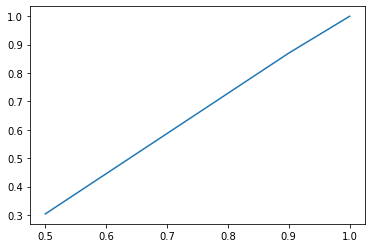

In [16]:
results.loc['n1'].plot()

## Example 7.1: TurboProp - Calibrating Model

### Exercise Information

Taking the data for the PW127 engine at sea level and stationary: free turbine shaft power 2457 kW, compressor air flow 8.49 kg/s, compressor pressure ratio 15.77 and combustion chamber outlet temperature 1600K. Calibrate the engine in the performance simulation to obtain shaft power close to the reported by the manufacturer.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0                 |
| Atmospheric Pressure                     | 101.30 kPa        |
| Atmospheric Temperature                  | 288.15 K          |
| % of maximum compressor rotation         | 1.00              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |

Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 1.00              |








### Part 1: Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

In [7]:
values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()
performance_results1



,1
BSFC,0.000079
EBSFC,0.000079
TSFC,0.057692
fuel_consumption,0.193306
gearbox_power,2402.185623
specific_power_turbine,288.788546
specific_thrust,0.394757
thrust_hot_air,3.350658
thrust_propeller,0.000000
thrust_total,3.350658


### Part 2: Comparing to Manufacturer Report

The thermodynamic power of the turbine is superior to the limit power of the gearbox.
Thus, the solution is to reduce the compressor rotation.

Engine Parameters varied to achieve the manufacture perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Pressure Ratio in the Free Turbine       | 2.87              |
| % of maximum rotation in the compressor  | 0.941             |

In [8]:
values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 0,
    'ta': 288.15,
    'pa': 101.30,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()


turboprop.set_n2(0.941)
performance_results2 = turboprop.sumarise_results()
thermodynamic_results2 = turboprop.sumarise()
pd.concat([thermodynamic_results1, thermodynamic_results2], axis=1)
pd.concat([performance_results1, performance_results2], axis=1)

,1.000,0.941
BSFC,0.000079,0.000077
EBSFC,0.000079,0.000077
TSFC,0.057692,0.071996
fuel_consumption,0.193306,0.157170
gearbox_power,2402.185623,2004.268353
specific_power_turbine,288.788546,269.641072
specific_thrust,0.394757,0.287816
thrust_hot_air,3.350658,2.183023
thrust_propeller,0.000000,0.000000
thrust_total,3.350658,2.183023


## Example 7.2: TurboProp - Flight Condition Simulation

### Exercise Information

Now simulate the engine operating at 7,000 m and Mach 0.45, keeping other input parameters constant compared to Example 8.1. As operating strategy consider N1 = 100% and N2 = 85%.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 8.49 kg/s         |
| Outlet temperature in combustion chamber | 1600 K            |
| Pressure Ration in Compressor            | 15.77             |


Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,85                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 1,00                 | 1,35                |
| compressor turbine | 0,90                 | 1,33                |
| free turbine       | 0,90                 | 1,33                |
| hot air nozzle     | 0,98                 | 1,36                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |








### Part 1: Exercise computation
Calibrating the model to the manufacturer report with pressure ratio in the turbine equal to 2.87 and % of maximum rotation equals to 1.00.

In [11]:
values = {
    'mass_flow': 8.49,
    't04': 1600,
    'prc': 15.77,
    'u_in': 141.64,
    'ta': 246.55,
    'pa': 41,
    'n_d': 0.85,
    'gamma_d': 1.4,
    'n_c': 0.75,
    'gamma_c': 1.37,
    'n_b': 1,
    'gamma_b': 1.35,
    'n_t': 0.9,
    'gamma_t': 1.33,
    'n_tl': 0.9,
    'gamma_tl': 1.33,
    'n_n': 0.98,
    'gamma_n': 1.36,
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'cp_tl': 1.160,
    'r': 288.3,
    'pr_tl': 2.87,
    'gearbox_power_ratio': 0.98,
    'propeller_efficiency': 0.85,
    }

turboprop = mf.TurboProp(values)
turboprop.set_n2(0.85)
performance_results1 = turboprop.sumarise_results()
thermodynamic_results1 = turboprop.sumarise()

performance_results1

,0.85
BSFC,0.000084
EBSFC,0.000074
TSFC,0.012223
fuel_consumption,0.046673
gearbox_power,620.531136
specific_power_turbine,226.060892
specific_thrust,0.231409
thrust_hot_air,0.648174
thrust_propeller,3.723888
thrust_total,4.372062


## Example 7.3: TurboFan - Comparing to TurboProp 7.2

### Exercise Information

Simulate a turbofan engine to fulfill the same mission
of the turbofan engine in example 8.2, i.e. generate thrust of 4.26 kN at 7,000 m and flight Mach 0.45. To make the simulations we took as reference data from the PW545B engine, with a total pressure ratio of 12.5 and a passage ratio of 4.2 in the take-off condition at sea level. Some assumptions were made for the simulation as will be discussed in the following.

Operating Engine Parameters:

| Baseline Operating Condition             |                   |
|------------------------------------------|-------------------|
| Outlet temperature in combustion chamber | 1550 K            |
| Pressure Ration in Compressor            | 8.33              |
| Pressure Ration in Booster               | 1.00              |
| Pressure Ration in Fan                   | 1.50              |
| Air bypass ratio                         | 4.2               |
| Pressure loss in combustion chamber      |  0 %              |

Operating Condition:

| Flight Operation Condition               |                   |
|------------------------------------------|-------------------|
| Flight  Mach                             | 0.45              |
| Atmospheric Pressure                     | 41.00 kPa         |
| Atmospheric Temperature                  | 246.55 K          |
| % of maximum compressor rotation         | 0.85              |


Efficiency and specific heat ratio data:

| Component          | Adiabatic Efficiency | Specific Heat Ratio |
|--------------------|----------------------|---------------------|
| intake             | 0,97                 | 1,40                |
| fan                | 0,90                 | 1,40                |
| compressor         | 0,75                 | 1,37                |
| combustion         | 0,9995               | 1,35                |
| compressor turbine | 0.90                 | 1,33                |
| compressor fan     | 0.90                 | 1,33                |
| Hot air nozzle     | 0,98                 | 1,36                |
| Fan nozzle         | 0,98                 | 1,40                |

Thermodynamic Data:

| Thermodynamic Data                       |                   |
|------------------------------------------|-------------------|
| Lower Heating Value of the Fuel          | 45000 kJ/kg       |
| Mean R                                   | 288,3 m^2/(s^2.K) |
| specific heat in the combustion chamber  | 1,11 kJ/(kg.K)    |

Engine Parameters varied to achieve the TurboProp example 7.2  perfomance:

| Engine Parameters                        |                   |
|------------------------------------------|-------------------|
| Mass Flux                                | 88.42 kg/s        |



### Exercise Computation